In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
HOME = "/content/drive/MyDrive/Colab_Notebooks/recommendation"
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv(HOME+"/datasets/optimized_chunks.csv")
# 'rating', 'watched_episodes',
mainColumns = ['action_x',
       'adventure_x', 'comedy_x', 'drama_x', 'sci-fi_x', 'space_x',
       'mystery_x', 'shounen_x', 'police_x', 'supernatural_x', 'magic_x',
       'fantasy_x', 'sports_x', 'josei_x', 'romance_x', 'slice of life_x',
       'cars_x', 'seinen_x', 'horror_x', 'psychological_x', 'thriller_x',
       'super power_x', 'martial arts_x', 'school_x', 'ecchi_x',
       'vampire_x', 'military_x', 'historical_x', 'dementia_x', 'mecha_x',
       'demons_x', 'samurai_x', 'game_x', 'shoujo_x', 'harem_x',
       'music_x', 'shoujo ai_x', 'shounen ai_x', 'kids_x', 'hentai_x',
       'parody_x', 'yuri_x', 'yaoi_x', 'action_y',
       'adventure_y', 'comedy_y', 'drama_y', 'sci-fi_y', 'space_y',
       'mystery_y', 'shounen_y', 'police_y', 'supernatural_y', 'magic_y',
       'fantasy_y', 'sports_y', 'josei_y', 'romance_y', 'slice of life_y',
       'cars_y', 'seinen_y', 'horror_y', 'psychological_y', 'thriller_y',
       'super power_y', 'martial arts_y', 'school_y', 'ecchi_y',
       'vampire_y', 'military_y', 'historical_y', 'dementia_y', 'mecha_y',
       'demons_y', 'samurai_y', 'game_y', 'shoujo_y', 'harem_y',
       'music_y', 'shoujo ai_y', 'shounen ai_y', 'kids_y', 'hentai_y',
       'parody_y', 'yuri_y', 'yaoi_y','watching_status']

<ipython-input-2-e1aa1ba1c5ce>:1: DtypeWarning: Columns (50,55,64,73,74,75,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(HOME+"/datasets/optimized_chunks.csv")


In [3]:
data

,user_id,anime_id,rating,watching_status,watched_episodes,action_x,adventure_x,comedy_x,drama_x,sci-fi_x,...,shoujo_y,harem_y,music_y,shoujo ai_y,shounen ai_y,kids_y,hentai_y,parody_y,yuri_y,yaoi_y
0,0,67,9,1,1,1.0000,1.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
1,14,67,0,0,0,0.9996,0.0080,0.0003,0.0014,0.0003,...,0,0,0,0,0,0,0,0,0,0
2,34,67,10,1,24,0.0234,0.0057,0.6244,0.0005,0.0000,...,0,0,0,0,0,0,0,0,0,0
3,55,67,0,1,0,0.0063,0.0176,0.0250,0.0024,0.0004,...,0,0,0,0,0,0,0,0,0,0
4,57,67,0,1,0,1.0000,1.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,336,9342,1,1,1,0.2112,0.0003,0.0668,0.0004,0.2503,...,0,0,0,0,0,0,0,0,0,0
99996,336,6567,3,1,1,0.0297,0.0003,0.0846,0.0004,0.0353,...,0,0,0,0,0,0,0,0,0,0
99997,336,41795,1,0,1,0.0050,0.0043,0.0453,0.0004,0.0005,...,0,0,0,0,0,0,1,0,0,0
99998,336,21013,3,0,15,0.0075,0.0022,0.0226,0.0004,0.0005,...,0,0,0,0,0,1,0,0,0,0


In [4]:
mainData = data[mainColumns].values

#shuffling and spliting into input & target
shuffled_indices = np.arange(mainData.shape[0])
np.random.shuffle(shuffled_indices)

inputsMainData = mainData[: , 0:-1]
targetMainData = mainData[:,-1].reshape(-1,1)

shuffled_inputs = inputsMainData[shuffled_indices]
shuffled_targets = targetMainData[shuffled_indices]

In [5]:
sample_count = mainData.shape[0]
train_samples_count = int(0.7*sample_count)
validation_samples_count = int(0.2*sample_count)
test_samples_count = sample_count - train_samples_count - validation_samples_count

In [6]:
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

In [7]:
train_inputs.shape

(70000, 86)

In [8]:
input_size = train_inputs.shape[1]
output_size = 2
hidden_layer_size = 100
batch_size = 100
max_epochs  = 50

early_stopping = tf.keras.callbacks.EarlyStopping(patience=6)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_inputs,
                    train_targets,
                    batch_size=batch_size,
                    epochs=max_epochs,
                    callbacks=[early_stopping],
                    validation_data=(validation_inputs, validation_targets),
                    verbose=2)

Epoch 1/50
700/700 - 8s - loss: 0.6063 - accuracy: 0.6616 - val_loss: 0.5975 - val_accuracy: 0.6715 - 8s/epoch - 11ms/step
Epoch 2/50
700/700 - 2s - loss: 0.5896 - accuracy: 0.6777 - val_loss: 0.5916 - val_accuracy: 0.6779 - 2s/epoch - 2ms/step
Epoch 3/50
700/700 - 2s - loss: 0.5805 - accuracy: 0.6841 - val_loss: 0.5932 - val_accuracy: 0.6768 - 2s/epoch - 2ms/step
Epoch 4/50
700/700 - 1s - loss: 0.5716 - accuracy: 0.6925 - val_loss: 0.5838 - val_accuracy: 0.6839 - 1s/epoch - 2ms/step
Epoch 5/50
700/700 - 2s - loss: 0.5648 - accuracy: 0.6960 - val_loss: 0.5835 - val_accuracy: 0.6850 - 2s/epoch - 2ms/step
Epoch 6/50
700/700 - 1s - loss: 0.5567 - accuracy: 0.7012 - val_loss: 0.5835 - val_accuracy: 0.6831 - 1s/epoch - 2ms/step
Epoch 7/50
700/700 - 2s - loss: 0.5506 - accuracy: 0.7047 - val_loss: 0.5816 - val_accuracy: 0.6848 - 2s/epoch - 3ms/step
Epoch 8/50
700/700 - 2s - loss: 0.5440 - accuracy: 0.7106 - val_loss: 0.5791 - val_accuracy: 0.6860 - 2s/epoch - 3ms/step
Epoch 9/50
700/700 - 2s

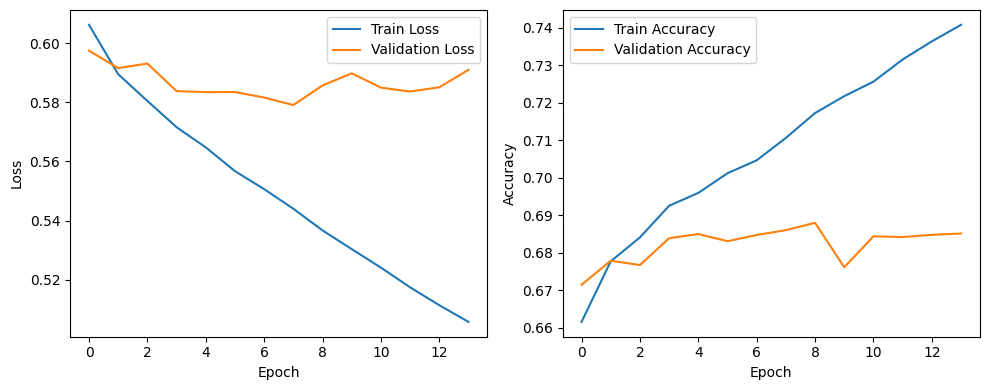

In [9]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Create a 'models' folder if it doesn't exist
models_folder = "/models"

# Save the trained model
model_filename = os.path.join( HOME +  models_folder, "prototype1")
model.save(model_filename)

print(f"Model saved as '{model_filename}'")

Model saved as '/content/drive/MyDrive/Colab_Notebooks/recommendation/models/prototype1'


313/313 [==============================] - 1s 1ms/step
Test accuracy: 0.68%


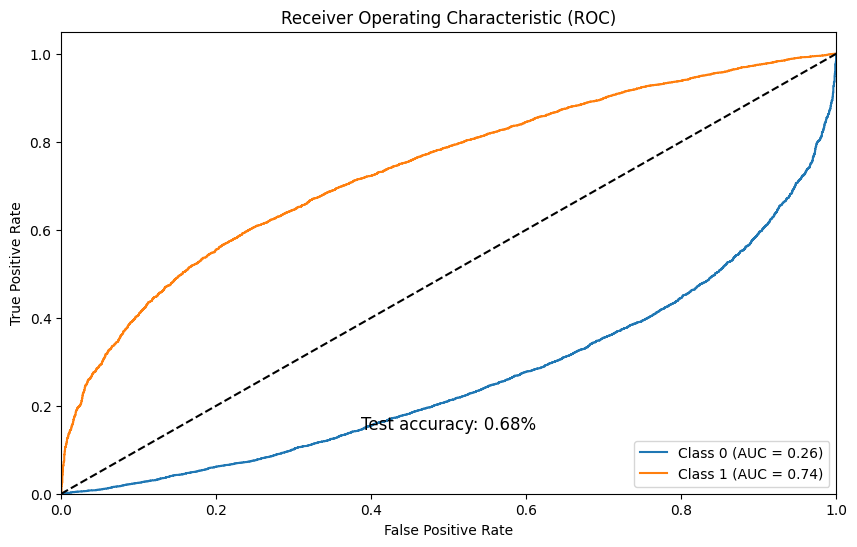

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load the saved model
model_filename = HOME + "/models/prototype1"
loaded_model = tf.keras.models.load_model(model_filename)

# Assuming you have test_inputs and test_targets defined
# Replace with your actual test data

# Predict using the loaded model
predictions = loaded_model.predict(test_inputs)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_targets, predicted_labels)
print(f"Test accuracy: {accuracy:.2f}%")

# Assuming your test_targets are integer labels (0 and 1)
# If not, convert them to integer labels
test_targets = test_targets.astype(int)

# Calculate ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(predictions.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_targets, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
for i in range(predictions.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Display accuracy
plt.text(0.5, 0.15, f"Test accuracy: {accuracy:.2f}%", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [29]:
sum(train_targets)[0]/train_targets.shape[0]

0.6277714285714285